In [44]:
"""
author: 陈凯鑫
datetime: 2023-8-10
假期应该多陪陪家人,而不是为了一个不确定的机会去挣扎
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置图片dpi
plt.rcParams['figure.dpi'] = 300

In [45]:
"""
导入数据
"""
data = pd.read_excel('附件(1).xlsx',sheet_name='Sheet1',index_col=0)
# 选取1-15列
data = data.iloc[:,0:14]
# 删除第180行
data = data.drop(index=180)
# 选取前390行
data = data.iloc[0:389,:]

In [46]:
"""
将整晚睡眠时间（时：分：秒）统一转换为小时
"""
data['整晚睡眠时间（时：分：秒）'] = pd.to_datetime(data['整晚睡眠时间（时：分：秒）'], format='%H:%M:%S').dt.time
def time_to_float(time_obj):
    return time_obj.hour + time_obj.minute / 60 + time_obj.second / 3600
data['整晚睡眠时间（时：分：秒）'] = data['整晚睡眠时间（时：分：秒）'].apply(time_to_float)

In [47]:
"""
将行为特征按照矛盾型是1 中等型是2 安静型是3 进行map
"""
data['婴儿行为特征'] = data['婴儿行为特征'].map({'矛盾型':1,'中等型':2,'安静型':3})
data
# 导出excel
data.to_excel('第一问预处理后的数据1.xlsx')

In [48]:
"""
典型相关系数的假设检验
"""
# 我们选取母亲年龄,教育程度,妊娠时间（周数）作为第一组变量,选取婴儿行为特征,整晚睡眠时间（时：分：秒）,睡醒次数
X = data[['母亲年龄','教育程度','妊娠时间（周数）']]
Y = data[['婴儿行为特征','整晚睡眠时间（时：分：秒）','睡醒次数']]
# 进行典型相关系数的检验
from sklearn import cross_decomposition
cca = cross_decomposition.CCA(n_components=1)
cca.fit(X,Y)
# 输出相关程度
print(cca.score(X,Y))



-0.21652390752231554


C:\Users\44279\PycharmProjects\pythonproject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\44279\PycharmProjects\pythonproject\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


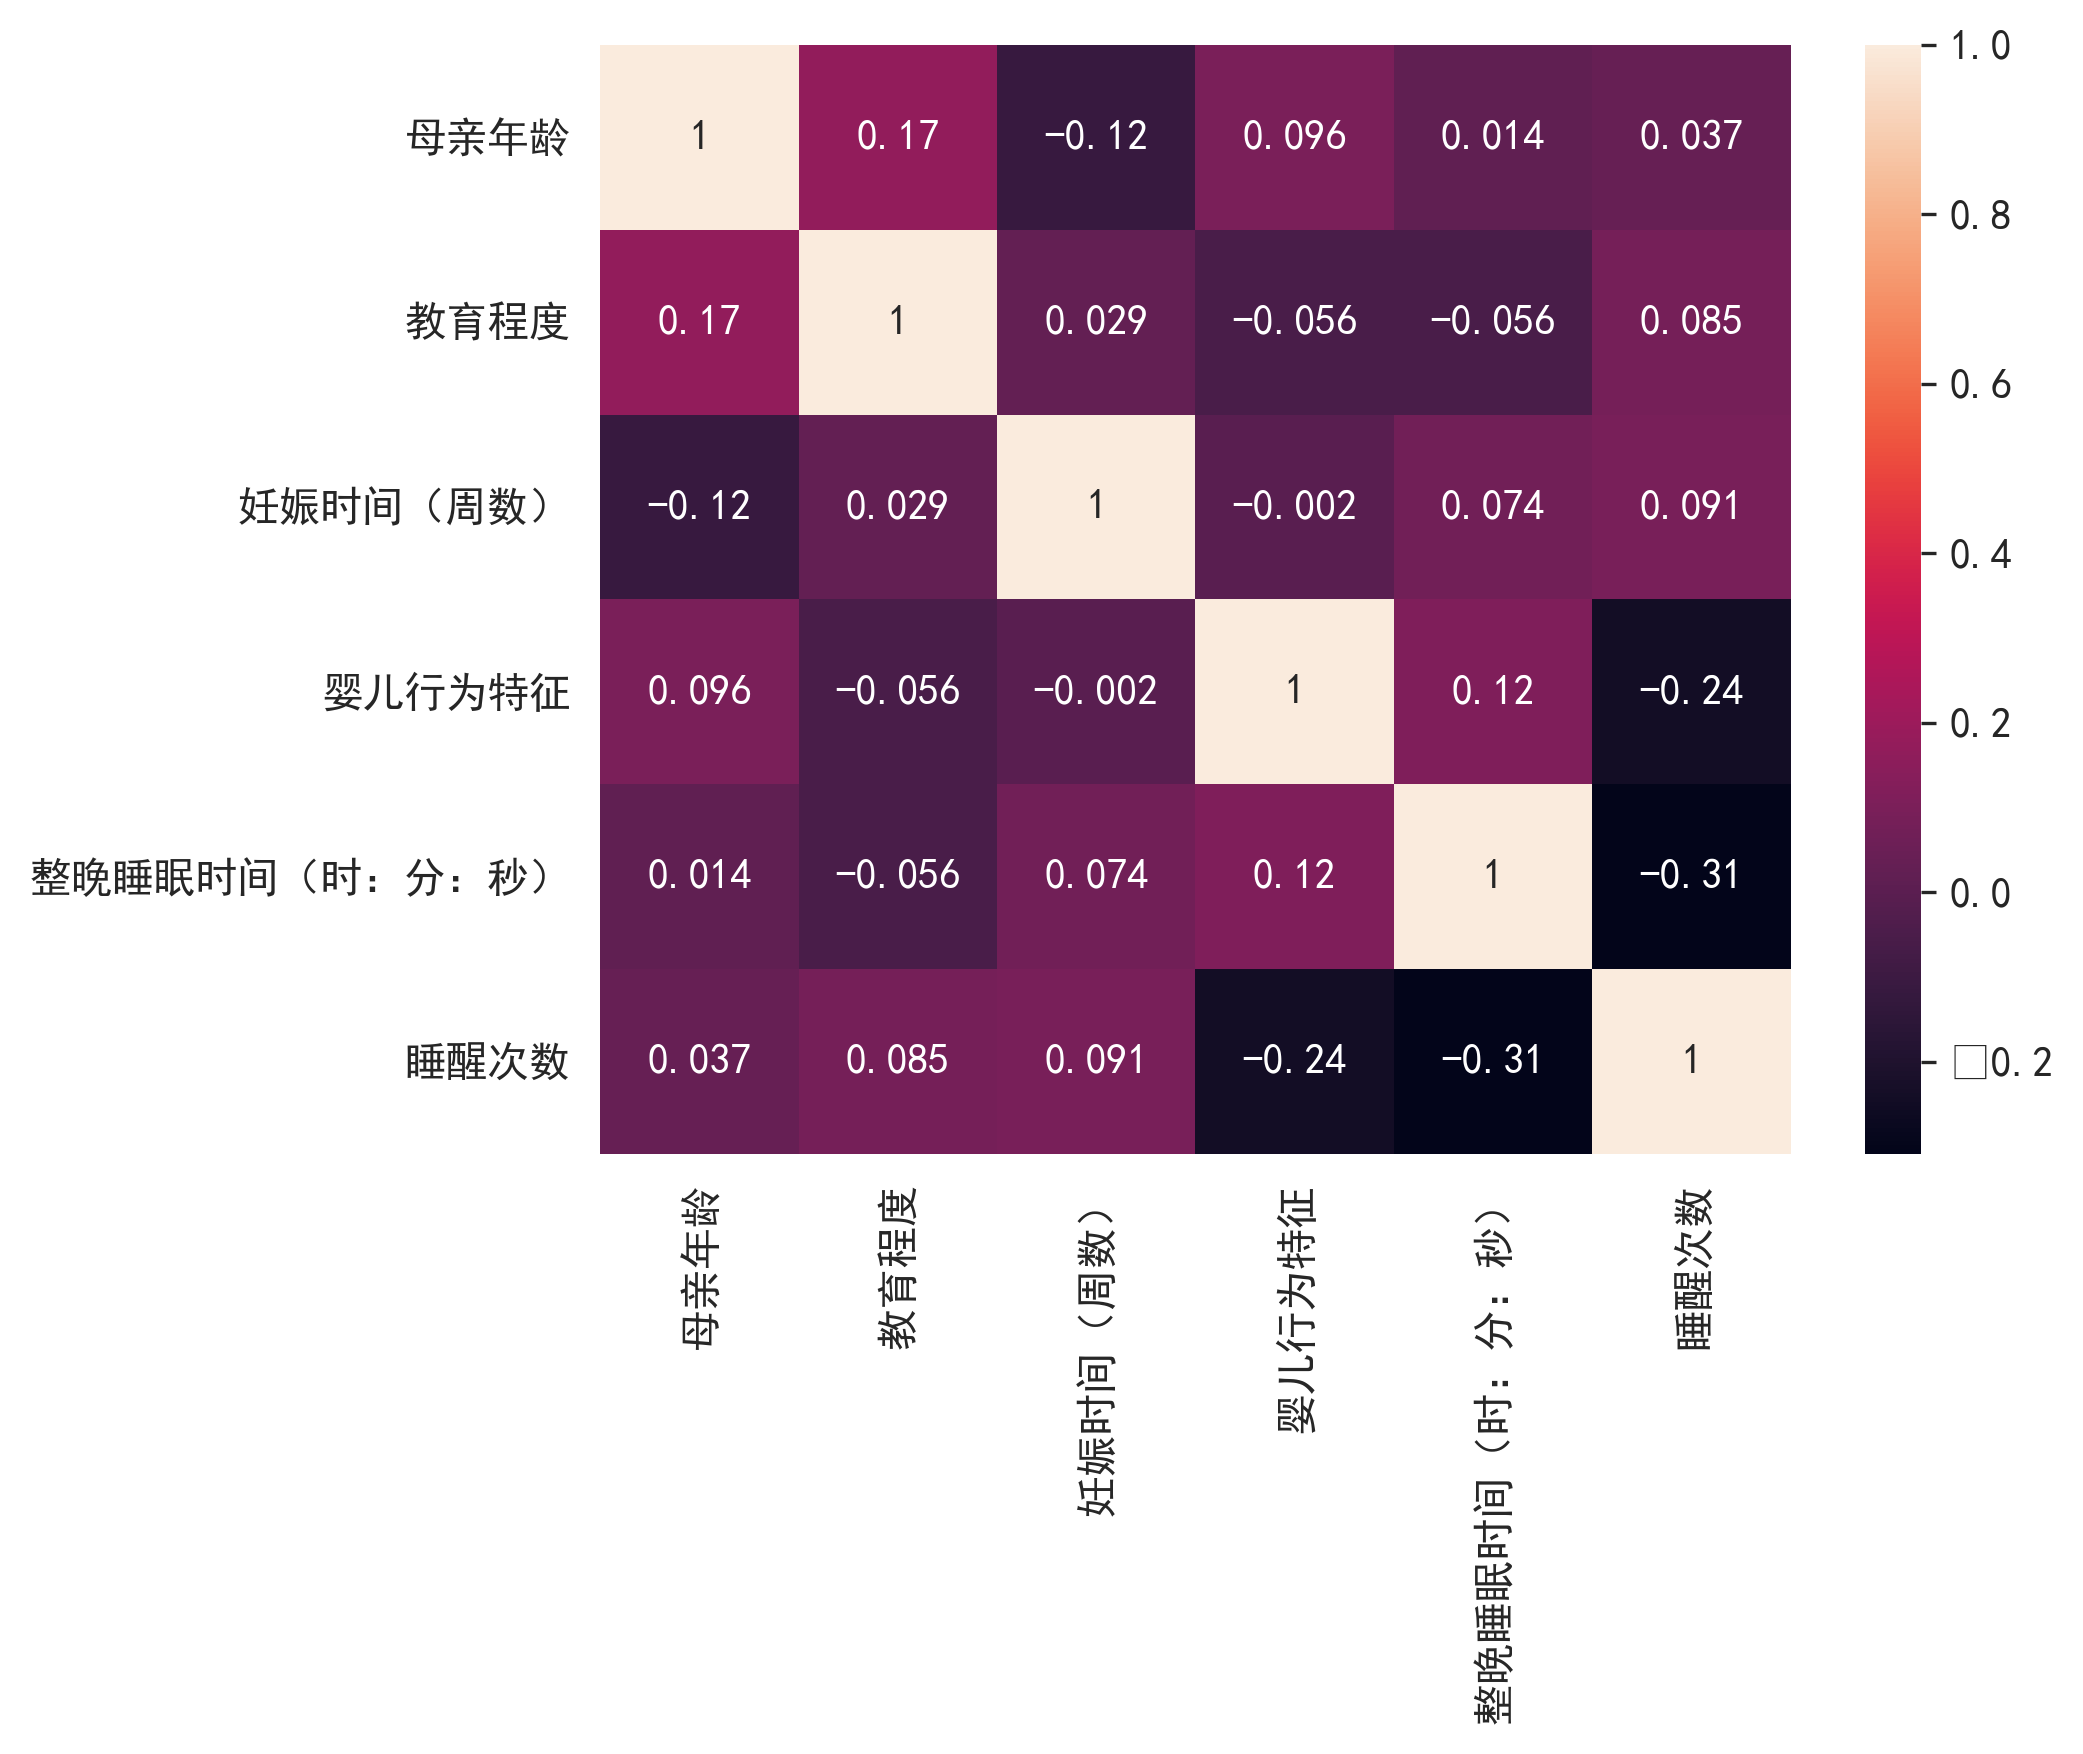

In [49]:
"""
斯皮尔曼相关性分析
"""
# 选取母亲年龄,教育程度,妊娠时间（周数）,婴儿行为特征,整晚睡眠时间（时：分：秒）,睡醒次数
data_1 = data[['母亲年龄','教育程度','妊娠时间（周数）','婴儿行为特征','整晚睡眠时间（时：分：秒）','睡醒次数']]
# 计算斯皮尔曼相关系数
corr = data_1.corr(method='spearman')
# 画出热力图
sns.heatmap(corr,annot=True)
plt.show()


C:\Users\44279\PycharmProjects\pythonproject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\44279\PycharmProjects\pythonproject\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


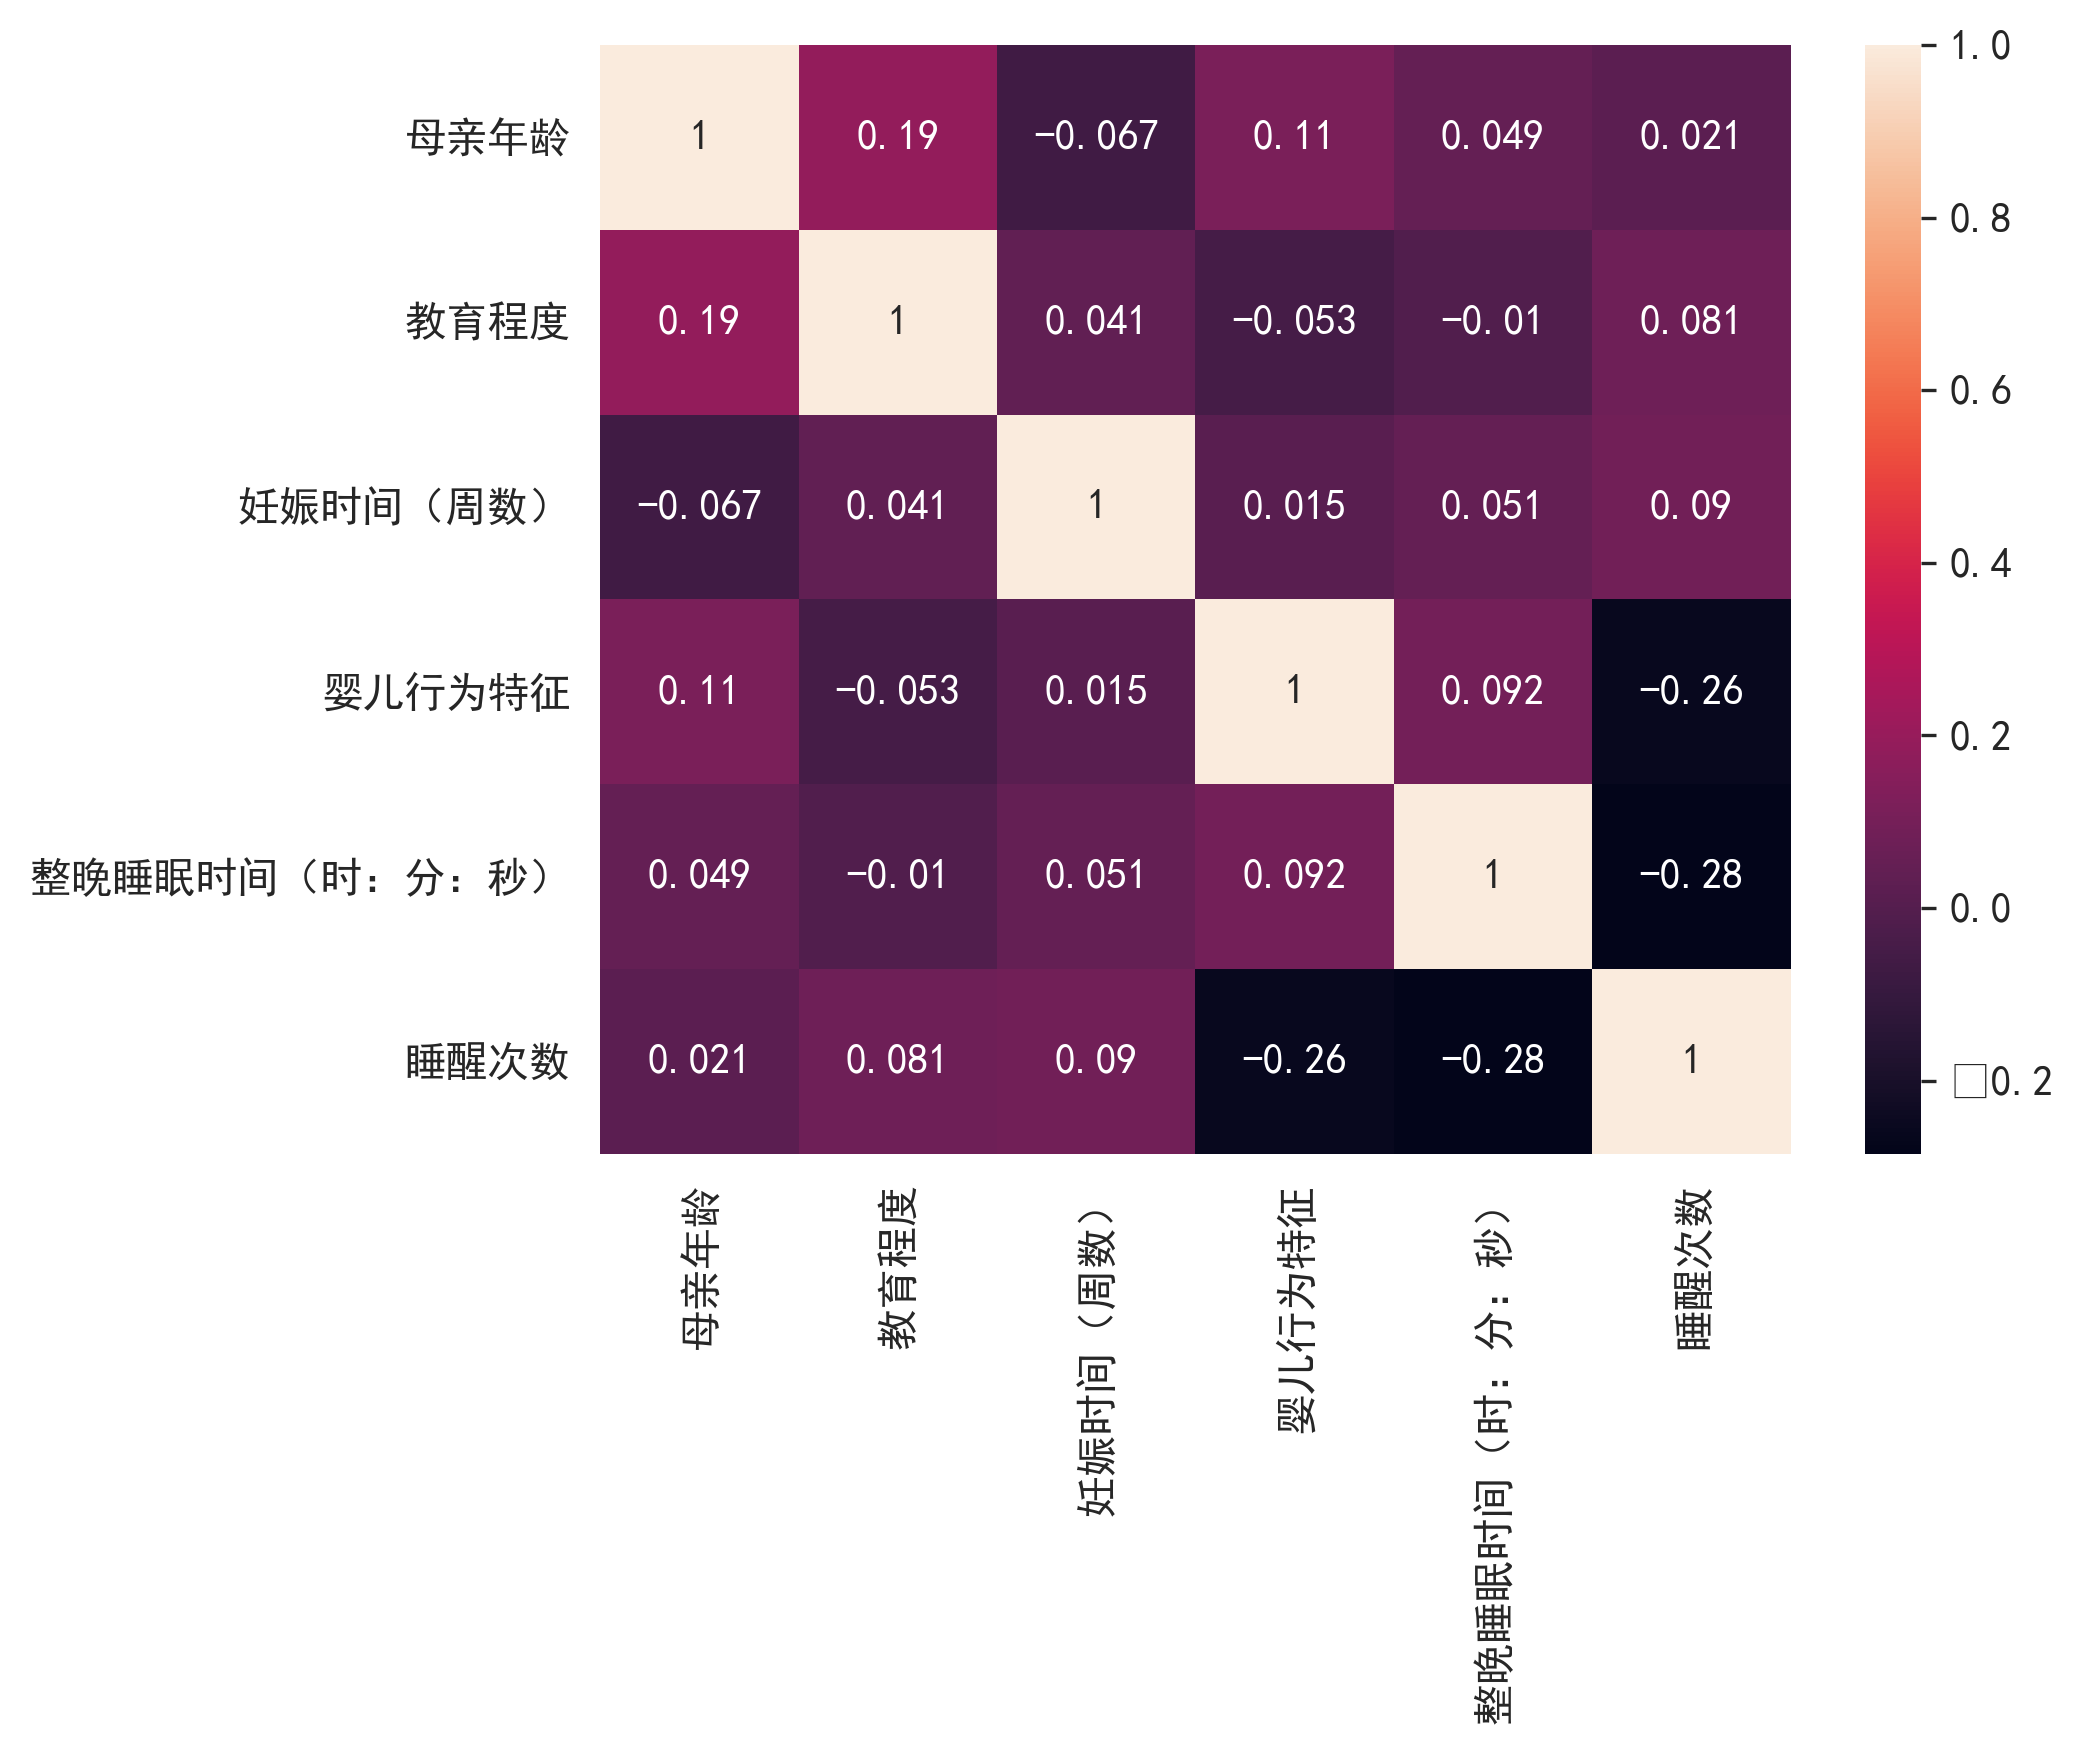

In [50]:
"""
皮尔森相关系数
"""
data_2 = data[['母亲年龄','教育程度','妊娠时间（周数）','婴儿行为特征','整晚睡眠时间（时：分：秒）','睡醒次数']]
# 计算斯皮尔曼相关系数
corr = data_2.corr(method='pearson')
# 画出热力图
sns.heatmap(corr,annot=True)
plt.show()

In [51]:
"""
多元回归模型
"""
import statsmodels.api as sm
X = data[['母亲年龄', '婚姻状况', '教育程度', '妊娠时间（周数）', '分娩方式', 'CBTS', 'EPDS', 'HADS']]
Y1 = data['婴儿行为特征']
Y2 = data['整晚睡眠时间（时：分：秒）']
model1 = sm.OLS(Y1, X)
model2 = sm.OLS(Y2, X)
result1 = model1.fit()
result2 = model2.fit()
# 输出回归结果概要
print(result1.summary())
# 输出各个指标的系数估计值和显著性检验结果
print(result1.params)
print(result1.pvalues)
# 遍历所有的指标,如果p值小于0.05,则输出该指标与另一个指标相关性显著
for i in range(len(result1.pvalues)):
    if result1.pvalues[i] < 0.05:
        print(X.columns[i], '与婴儿行为特征相关性显著')
    else:
        print(X.columns[i], '与婴儿行为特征相关性不显著')
# 输出回归结果概要
print(result2.summary())
# 输出各个指标的系数估计值和显著性检验结果
print(result2.params)
print(result2.pvalues)
# 遍历所有的指标,如果p值小于0.05,则输出该指标与另一个指标相关性显著
for i in range(len(result2.pvalues)):
    if result2.pvalues[i] < 0.05:
        print(X.columns[i], '与整晚睡眠时间（时：分：秒）相关性显著')
    else:
        print(X.columns[i], '与整晚睡眠时间（时：分：秒）相关性不显著')

                                 OLS Regression Results                                
Dep. Variable:                 婴儿行为特征   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              607.2
Date:                Thu, 10 Aug 2023   Prob (F-statistic):                   1.35e-211
Time:                        20:52:55   Log-Likelihood:                         -362.67
No. Observations:                 389   AIC:                                      741.3
Df Residuals:                     381   BIC:                                      773.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------